<a href="https://colab.research.google.com/github/NoobCoder-dweeb/AI-HandsOn-Journey/blob/main/notes/Building_a_Regression_MLP_Using_the_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)


In [3]:
X_train_full.shape, y_train_full.shape

((15480, 8), (15480,))

In [4]:
X_train.shape, y_train.shape

((11610, 8), (11610,))

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [6]:
import tensorflow as tf
from tensorflow import keras

In [8]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [10]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7389 - val_loss: 0.5239
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5389 - val_loss: 0.4670
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5105 - val_loss: 0.4526
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4766 - val_loss: 0.7339
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6427 - val_loss: 0.6872
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4839 - val_loss: 0.6968
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4534 - val_loss: 0.7857
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4318 - val_loss: 0.8994
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4462 - val_loss: 1.0606
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4488 - val_loss: 1.2329
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4273 - val_loss: 1.4056
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [11]:
mse_test = model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4792


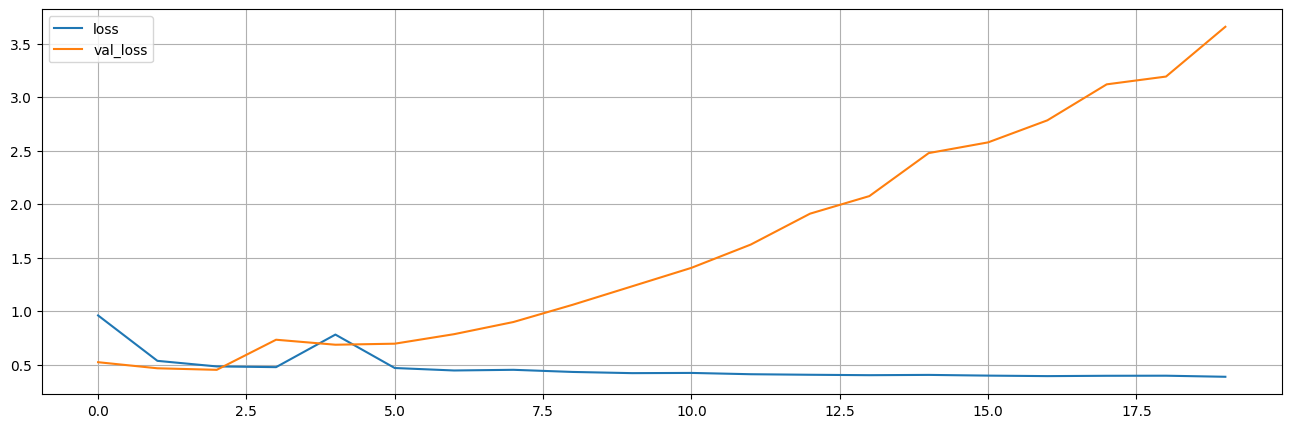

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(16,5))
plt.grid(True)
plt.show()

In [12]:
X_new = X_test[:3]

y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [13]:
y_pred

array([[1.1859962],
       [5.8707952],
       [0.5678657]], dtype=float32)

As you can see, the Sequential API is quite easy to use. However, although Sequential models are extremely common, it is sometimes useful to build neural networks with more complex topologies, or with multiple inputs or outputs. For this purpose, Keras offers the Functional API

# Building Complex Models Using the Functional API


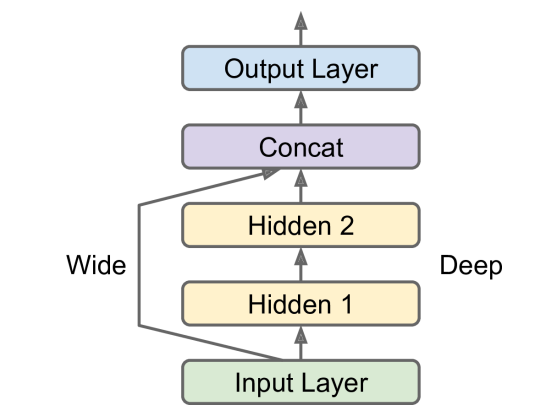

In [16]:
input_ = keras.layers.Input(shape=X_train.shape[1:], dtype=X_train.dtype)
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

But what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path (see Figure 10-15)? In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7):


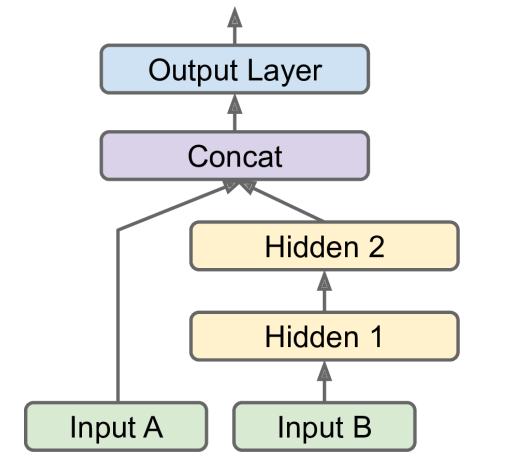

In [25]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [30]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [31]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [40]:
input_dict = {'wide_input': X_train_A, 'deep_input': X_train_B}

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

# TODO
#history = model.fit(x=input_dict, y=y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5170 - val_loss: 0.4993
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5089 - val_loss: 0.4943
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4937 - val_loss: 0.4909
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5177 - val_loss: 0.4842
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5075 - val_loss: 0.4864
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5016 - val_loss: 0.4851
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4912 - val_loss: 0.4791
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5069 - val_loss: 0.4761
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4889 - val_loss: 0.4771
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4900 - val_loss: 0.4774
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4922 - val_loss: 0.4761
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [33]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4819


In [34]:
y_pred = model.predict((X_new_A, X_new_B))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


In [35]:
y_pred

array([[0.8721006],
       [5.6153035],
       [1.5050039]], dtype=float32)

Cases that demands constructing model using Functional API:
1. task demands both regression and classification, eg. locate and classify main object in a picture
2. have multiple independent tasks based on the same data, eg. multiclass classification on faces, one output to classify smiling and another output to identify whether they are wearing glasses or not
3. as a regularisation technique, eg. adding auxiliary outputs in a NN architecture

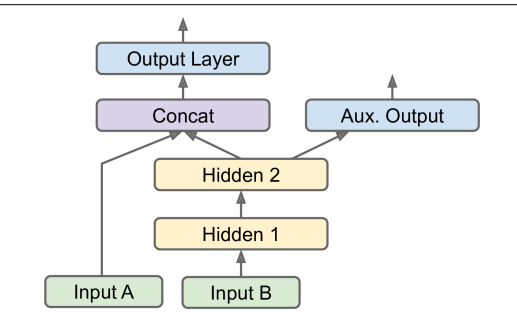

In [42]:
input_A_ = keras.layers.Input(shape=[5], name='wide_input')
input_B_ = keras.layers.Input(shape=[6], name='deep_input')
hidden1_ = keras.layers.Dense(30, activation='relu')(input_B_)
hidden2_ = keras.layers.Dense(30, activation='relu')(hidden1_)
concat_ = keras.layers.concatenate([input_A_, hidden2_])
output_ = keras.layers.Dense(1, name='main_output')(concat_)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2_)
model = keras.Model(inputs=[input_A_, input_B_], outputs=[output_, aux_output])

Each output will need its own loss function. Therefore, when we compile the model, we should pass a list of losses20 (if we pass a single loss, Keras will assume that the same loss must be used for all outputs).

By default, Keras will compute all these losses and simply add them up to get the final loss used for training. We care much more about the main output than about the auxiliary output (as it is just used for **regularization**), so we want to **give the main output’s loss a much greater weight**

In [43]:
model.compile(loss=['mse','mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

In [44]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train]
                    , epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - aux_output_loss: 0.3327 - loss: 1.7328 - main_output_loss: 1.4001 - val_aux_output_loss: 0.1171 - val_loss: 0.6369 - val_main_output_loss: 0.5197
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - aux_output_loss: 0.1178 - loss: 0.6116 - main_output_loss: 0.4938 - val_aux_output_loss: 0.0982 - val_loss: 0.6235 - val_main_output_loss: 0.5252
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.1030 - loss: 0.5535 - main_output_loss: 0.4504 - val_aux_output_loss: 0.0893 - val_loss: 0.7159 - val_main_output_loss: 0.6265
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.0895 - loss: 0.5070 - main_output_loss: 0.4175 - val_aux_output_loss: 0.0948 - val_loss: 1.4459 - val_main_output_loss: 1.3507
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.1028 - loss: 1.6971 - main_output_loss: 1.5943 - val_aux_output_loss: 0.1005 - val_loss: 0.7046 - val_main_output_loss: 0.6039


In [45]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - aux_output_loss: 0.0656 - loss: 0.6796 - main_output_loss: 0.6140


In [46]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [47]:
print(y_pred_main)
print(y_pred_aux)

[[0.91563815]
 [5.718207  ]
 [0.8814201 ]]
[[0.9231918]
 [5.1147294]
 [0.8084964]]


# Using the Subclassing API to Build Dynamic Models

In [48]:
class WideAndDeepModel(keras.Model):
 def __init__(self, units=30, activation="relu", **kwargs):
  super().__init__(**kwargs) # handles standard args (e.g., name)
  self.hidden1 = keras.layers.Dense(units, activation=activation)
  self.hidden2 = keras.layers.Dense(units, activation=activation)
  self.main_output = keras.layers.Dense(1)
  self.aux_output = keras.layers.Dense(1)
 def call(self, inputs):
  input_A, input_B = inputs
  hidden1 = self.hidden1(input_B)
  hidden2 = self.hidden2(hidden1)
  concat = keras.layers.concatenate([input_A, hidden2])
  main_output = self.main_output(concat)
  aux_output = self.aux_output(hidden2)
  return main_output, aux_output

In [49]:
model = WideAndDeepModel()